# LAB - Autoencoders

In [1]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False); 

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.0.0'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


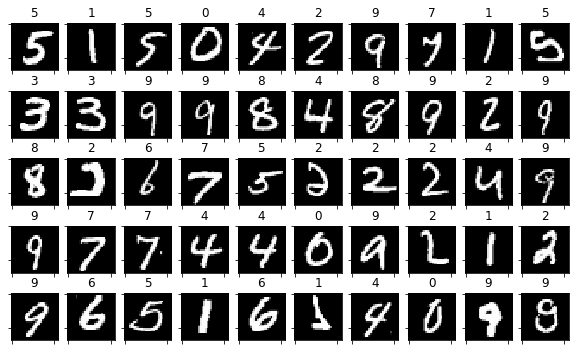

In [3]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## Autoencoder with small (sparse) activations

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [98]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.regularizers import l1
import tensorflow as tf

## Implement the following loss function

given:

- $k=50$, latent dimension
- $\mathbf{x}^{(i)} \in \mathbb{R}^{784}$
- $e(\mathbf{x}^{(i)}) \in \mathbb{R}^{k}$, the encoder
- $d(e(\mathbf{x}^{(i)})) \in \mathbb{R}^{784}$, the decoder

implement the following cost function

$$\text{loss}(\mathbf{x}^{(i)}) = \frac{1}{m}\sum_m \big(\mathbf{x}^{(i)} - d(e(\mathbf{x}^{(i)}))\big)^2 + \beta \frac{1}{k}\sum_{k,i} e(\mathbf{x}^{(i)})$$


In [107]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse


def get_model(input_dim, code_size, beta=.01):
    inputs = Input(shape=input_dim)
    encoder = Dense(code_size, activation='relu')(inputs)
    outputs = Dense(input_dim, activation='sigmoid')(encoder)

    avg_latent_activations = ...
    loss = ...

    model = Model([inputs], [outputs])    
    model.add_loss(loss)

    model.compile(optimizer='adam')
    return model, encoder, avg_latent_activations

In [108]:
model, encoder, avg_latent_activations = get_model(input_dim=X.shape[1], code_size=50, beta=0.05)

W0220 14:44:45.825977 4384662976 training_utils.py:1444] Output dense_27 missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to dense_27.


try with larger layer, try with more layers

In [109]:
model.fit(X_train, epochs=100, batch_size=32)

Train on 1200 samples
Epoch 1/100
1200/1200 [==============================] - 0s 171us/sample - loss: 0.2083
Epoch 2/100
1200/1200 [==============================] - 0s 49us/sample - loss: 0.1205
Epoch 3/100
1200/1200 [==============================] - 0s 45us/sample - loss: 0.1021
Epoch 4/100
1200/1200 [==============================] - 0s 46us/sample - loss: 0.0931
Epoch 5/100
1200/1200 [==============================] - 0s 46us/sample - loss: 0.0850
Epoch 6/100
1200/1200 [==============================] - 0s 52us/sample - loss: 0.0774
Epoch 7/100
1200/1200 [==============================] - 0s 55us/sample - loss: 0.0709
Epoch 8/100
1200/1200 [==============================] - 0s 54us/sample - loss: 0.0661
Epoch 9/100
1200/1200 [==============================] - 0s 54us/sample - loss: 0.0631
Epoch 10/100
1200/1200 [==============================] - 0s 54us/sample - loss: 0.0608
Epoch 11/100
1200/1200 [==============================] - 0s 48us/sample - loss: 0.0588
Epoch 12/100
1200/

Epoch 94/100
1200/1200 [==============================] - 0s 55us/sample - loss: 0.0352
Epoch 95/100
1200/1200 [==============================] - 0s 55us/sample - loss: 0.0351
Epoch 96/100
1200/1200 [==============================] - 0s 53us/sample - loss: 0.0350
Epoch 97/100
1200/1200 [==============================] - 0s 47us/sample - loss: 0.0349
Epoch 98/100
1200/1200 [==============================] - 0s 45us/sample - loss: 0.0348
Epoch 99/100
1200/1200 [==============================] - 0s 49us/sample - loss: 0.0348
Epoch 100/100
1200/1200 [==============================] - 0s 49us/sample - loss: 0.0347


In [118]:
fl = K.function([model.input], [avg_latent_activations])
fl(X_train)

[array([4.4608349e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.8072491e-01, 3.8508105e-01, 4.1526198e-01,
        1.7899944e-03, 0.0000000e+00, 0.0000000e+00, 4.2354482e-01,
        0.0000000e+00, 0.0000000e+00, 3.9055079e-01, 0.0000000e+00,
        3.2591656e-01, 6.4026034e-01, 0.0000000e+00, 4.1022152e-01,
        5.5418462e-01, 6.2894529e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.8380924e-01,
        0.0000000e+00, 0.0000000e+00, 3.5680971e-01, 0.0000000e+00,
        0.0000000e+00, 5.9563463e-04, 0.0000000e+00, 4.6177214e-01,
        0.0000000e+00, 5.4042482e-01, 0.0000000e+00, 0.0000000e+00,
        5.9360516e-01, 0.0000000e+00, 4.7642380e-01, 0.0000000e+00,
        5.6514001e-01, 0.0000000e+00, 3.5979575e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00], dtype=float32)]

###  test the reconstruction

In [119]:
...

Ellipsis

### show the weights

In [120]:
...

Ellipsis

### show activations in latent space

you should get something similar to this, indicating a much more sparse representation

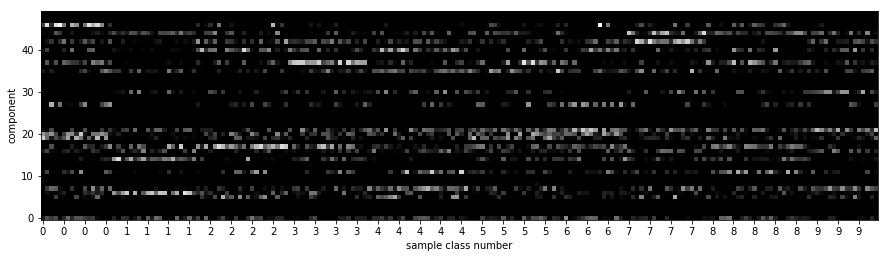

In [122]:
from IPython.display import Image
Image(filename='local/imgs/ae_sparse_activations.png')

In [ ]:
...

### show the distribution of activations in latent space

should be quite concentrated at 0

In [ ]:
...

### show most representative neuron in latent space for each class

now, representative neurons must show somewhat distinctive shapes for each number


In [ ]:
...